In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Flatten
#from keras.layers import SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [0]:
#X = [[[(i*j +j)/500] for i in range(5)] for j in range(100)]
#Y = [(i*6)/500 for i in range(100)]

In [0]:
X = [[[(i*j +j)] for i in range(5)] for j in range(100)]
Y = [(i*6) for i in range(100)]

In [0]:
  for i in range(100):
    print(X[i],Y[i])

[[0], [0], [0], [0], [0]] 0
[[1], [2], [3], [4], [5]] 6
[[2], [4], [6], [8], [10]] 12
[[3], [6], [9], [12], [15]] 18
[[4], [8], [12], [16], [20]] 24
[[5], [10], [15], [20], [25]] 30
[[6], [12], [18], [24], [30]] 36
[[7], [14], [21], [28], [35]] 42
[[8], [16], [24], [32], [40]] 48
[[9], [18], [27], [36], [45]] 54
[[10], [20], [30], [40], [50]] 60
[[11], [22], [33], [44], [55]] 66
[[12], [24], [36], [48], [60]] 72
[[13], [26], [39], [52], [65]] 78
[[14], [28], [42], [56], [70]] 84
[[15], [30], [45], [60], [75]] 90
[[16], [32], [48], [64], [80]] 96
[[17], [34], [51], [68], [85]] 102
[[18], [36], [54], [72], [90]] 108
[[19], [38], [57], [76], [95]] 114
[[20], [40], [60], [80], [100]] 120
[[21], [42], [63], [84], [105]] 126
[[22], [44], [66], [88], [110]] 132
[[23], [46], [69], [92], [115]] 138
[[24], [48], [72], [96], [120]] 144
[[25], [50], [75], [100], [125]] 150
[[26], [52], [78], [104], [130]] 156
[[27], [54], [81], [108], [135]] 162
[[28], [56], [84], [112], [140]] 168
[[29], [58], [8

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [0]:
X /= 500
Y/= 500

In [0]:
X[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                    random_state=5)

In [0]:
X_train

In [0]:
from keras.layers import SimpleRNN
#from keras.layers import LSTM
model = Sequential()
model.add(SimpleRNN(2,input_shape=(5,1), return_sequences=True))
model.add(SimpleRNN(2,input_shape=(5,1), return_sequences=True))
#model.add(SimpleRNN(1))
#model.add(SimpleRNN(1,input_shape=(5,1), return_state=True))
#model.add(LSTM((40),input_shape=(5,1), return_sequences=True))
#model.add(LSTM((3),input_shape=(5,1), return_state=True))
#model.add(SimpleRNN(50, return_sequences=True))
#model.add(SimpleRNN(50, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam',loss='mae', metrics=['acc'])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 5, 2)              8         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 5, 2)              10        
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, 
                 validation_data=(X_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 1s 7ms/step - loss: 1.1747 - acc: 0.0125 - val_loss: 1.0442 - val_acc: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 95us/step - loss: 1.1691 - acc: 0.0125 - val_loss: 1.0369 - val_acc: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 85us/step - loss: 1.1631 - acc: 0.0125 - val_loss: 1.0291 - val_acc: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 85us/step - loss: 1.1566 - acc: 0.0125 - val_loss: 1.0213 - val_acc: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 103us/step - loss: 1.1499 - acc: 0.0125 - val_loss: 1.0132 - val_acc: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 89us/step - loss: 1.1434 - acc: 0.0125 - val_loss: 1.0050 - val_acc: 0.0000e+00
Epoch 7/1000
80/80 [==============================] - 0s 79us/step - loss: 1.1367 - acc: 0.0125 - val_loss: 0.9967 - val_acc: 0.0000e+

In [0]:
y_predict = model.predict(X_test)

In [0]:
np.round(y_predict*500)

array([[374.],
       [222.],
       [301.],
       [195.],
       [394.],
       [159.],
       [ 53.],
       [136.],
       [112.],
       [241.],
       [432.],
       [253.],
       [384.],
       [270.],
       [356.],
       [235.],
       [281.],
       [346.],
       [ 70.],
       [382.]], dtype=float32)

In [0]:
np.round(y_test*500)

array([396., 192., 276., 168., 444., 138.,  60., 120., 102., 210., 582.,
       222., 420., 240., 360., 204., 252., 342.,  72., 414.],
      dtype=float32)

In [0]:
#y_train

In [0]:
#y_predict = model.predict(X_test)

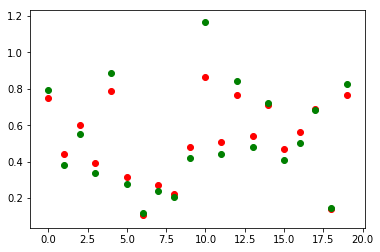

In [0]:
plt.scatter(range(20), y_predict, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

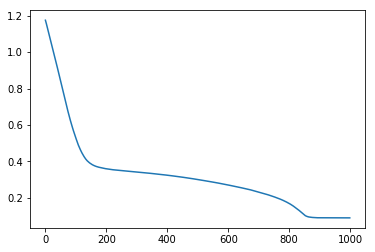

In [0]:
plt.plot(hist.history['loss'])
plt.show()